In [2]:
# grep -i "gw01.extranet.frachtwerk.de filterlog" pfsense.log > pfsense.csv
import pandas

df = pandas.read_csv("/Users/denakarimi/Desktop/WS20:21/BDA/pfsense.csv", sep=',', header=None, names=range(30))

df.head(100)


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17,20,21,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Sep 7 11:45:50 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51636,443,0.0,R,3551626076,NaN,0.0,NaN,NaN,NaN
1,Sep 7 11:45:52 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51652,443,0.0,R,900156233,NaN,0.0,NaN,NaN,NaN
2,Sep 7 11:46:00 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51704,443,0.0,R,319724059,NaN,0.0,NaN,NaN,NaN
3,Sep 7 11:46:00 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51704,443,0.0,R,319724059,NaN,0.0,NaN,NaN,NaN
4,Sep 7 11:46:12 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51770,443,0.0,R,3030680876,NaN,0.0,NaN,NaN,NaN
5,Sep 7 11:46:12 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51770,443,0.0,R,3030680876,NaN,0.0,NaN,NaN,NaN
6,Sep 7 11:46:13 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51772,443,0.0,R,2034642315,NaN,0.0,NaN,NaN,NaN
7,Sep 7 11:46:16 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1000000003,vtnet3,match,block,in,6,0x00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sep 7 11:46:35 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51904,443,0.0,R,1553315032,NaN,0.0,NaN,NaN,NaN
9,Sep 7 11:46:35 gw01.extranet.frachtwerk.de fi...,NaN,NaN,1599469328,vtnet3,match,block,in,4,0x0,...,51904,443,0.0,R,1553315032,NaN,0.0,NaN,NaN,NaN


3478.0     5477127
10051.0     554352
23.0        439300
445.0       437895
8080.0      198276
443.0       153621
81.0        152904
80.0        141623
465.0       138016
2587.0      107930
22.0         98260
5060.0       84316
3074.0       61134
1433.0       49927
3389.0       44686
5555.0       40339
27015.0      29855
6576.0       29362
28473.0      24431
8545.0       24291
5038.0       23165
8089.0       23153
10051        22621
123.0        22550
8291.0       21634
8443.0       19111
2323.0       19039
445          18621
53.0         18139
161.0        16824
            ...   
30066            1
13981            1
26793            1
34592            1
34992            1
46411.0          1
47684            1
48255            1
53921            1
38790            1
60598            1
47296            1
62914            1
8637             1
25555            1
8926             1
50916            1
14144            1
45462            1
19451            1
47383            1
55052       

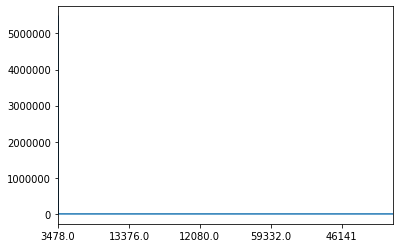

In [13]:
import matplotlib as plt

# df[21].plot ()

# plt.show ()

countedvalues = df[21].value_counts()

print (countedvalues)

countedvalues.plot ()







In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots ()
ax.bar(str(countedvalues.index),countedvalues.values, width=1)
plt.show()

In [ ]:
countedvalues["percent"]=countedvalues.apply(lambda x: x/sum(countedvalues))